### Project Title: Cellular Automaton Simulation in Python

#### Introduction:
This project simulates a basic two-dimensional Cellular Automaton, similar to Conway's Game of Life. The grid comprises cells that can be in one of two states: live (1) or dead (0). The evolution of the grid follows defined rules based on the states of neighboring cells, creating dynamic patterns over multiple generations.

#### Project Objectives:

Implement the Cellular Automaton rules using Python functions.
Visualize the evolution of the grid state over multiple generations.
Present all simulated generations in a grid layout for better visualization.
Core Features:

#### Randomized initial grid state.
Rule-based updates for live and dead cells based on neighbor counts.
Visualization of the grid's evolution both sequentially and as a montage layout.
This project demonstrates the fundamental principles of cellular automata and provides an engaging way to visualize computational rules leading to emergent behavior patterns. It can be extended to more complex automata and real-world simulations such as population models or physics simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

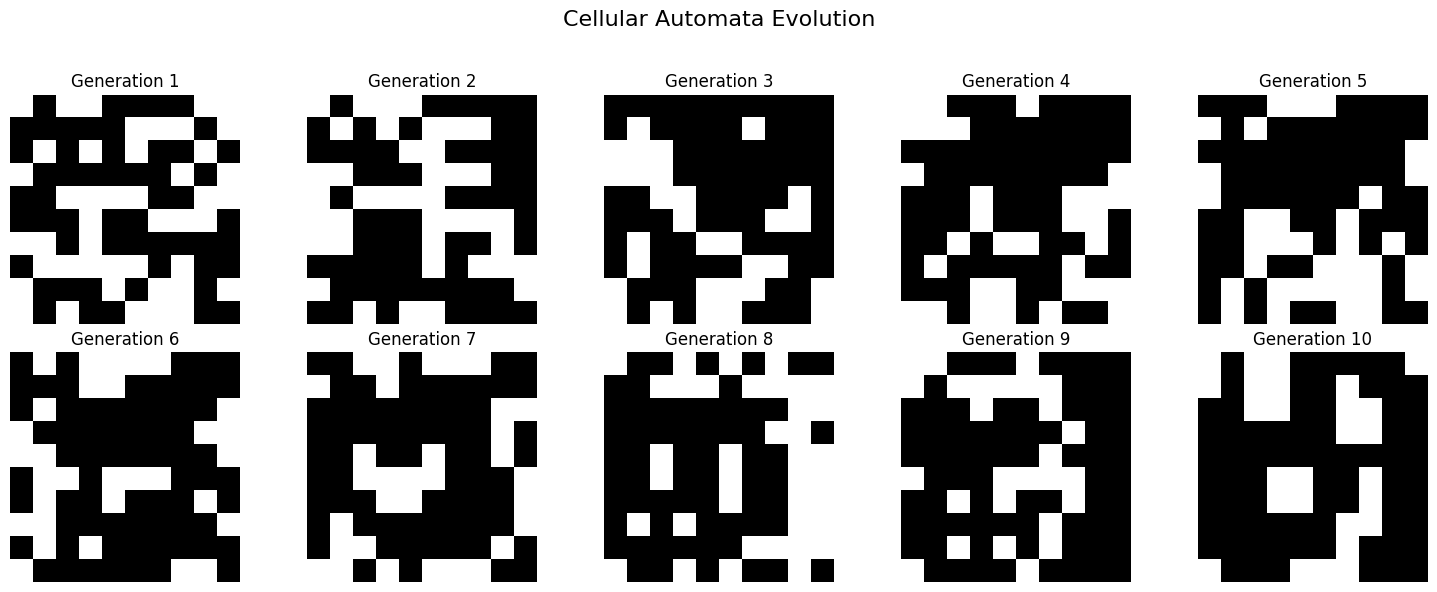

In [5]:

# Initialize grid size and number of generations
grid_size = 10  # The size of the cellular grid (10x10)
generations = 10  # Number of generations to simulate

# Create a random initial state for the grid
# 0 represents a dead cell, 1 represents a live cell
grid = np.random.randint(2, size=(grid_size, grid_size))


def count_live_neighbors(grid, x, y):
    """
    Count the number of live neighbors for a cell at (x, y).
    Args:
        grid (np.array): The 2D grid of cells.
        x (int): Row index of the target cell.
        y (int): Column index of the target cell.

    Returns:
        int: The number of live neighbors.
    """
    rows, cols = grid.shape
    # Neighboring positions relative to (x, y)
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    live_neighbors = 0

    for dx, dy in neighbors:
        # Calculate neighbor coordinates with wrap-around (toroidal grid)
        nx, ny = (x + dx) % rows, (y + dy) % cols
        # Increment the count if the neighbor is a live cell
        live_neighbors += grid[nx, ny]

    return live_neighbors


def update_grid(grid):
    """
    Update the grid based on the rules of the cellular automaton.
    Args:
        grid (np.array): The current grid state.

    Returns:
        np.array: The updated grid state.
    """
    rows, cols = grid.shape
    # Create a copy of the grid to store the updated state
    new_grid = grid.copy()

    for x in range(rows):
        for y in range(cols):
            # Count the number of live neighbors for the current cell
            live_neighbors = count_live_neighbors(grid, x, y)

            if grid[x, y] == 1:  # Live cell
                # A live cell dies if it has fewer than 2 or more than 3 live neighbors
                if live_neighbors < 2 or live_neighbors > 3:
                    new_grid[x, y] = 0  # Cell dies
            else:  # Dead cell
                # A dead cell becomes alive if it has exactly 3 live neighbors
                if live_neighbors == 3:
                    new_grid[x, y] = 1  # Cell becomes alive

    return new_grid


def visualize_generations(grid_snapshots, generations):
    """
    Visualize all generations in a single grid layout.
    Args:
        grid_snapshots (list): List of 2D arrays representing the grid state at each generation.
        generations (int): Number of generations to display.
    """
    cols = 5  # Number of columns in the plot grid
    rows = int(np.ceil(generations / cols))  # Calculate required rows

    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    for i, ax in enumerate(axes.flat):
        if i < generations:
            ax.imshow(grid_snapshots[i], cmap='gray')  # Show grid snapshot
            ax.set_title(f'Generation {i + 1}')
            ax.axis('off')  # Hide axis for cleaner visualization
        else:
            ax.axis('off')  # Hide unused plot cells

    plt.suptitle("Cellular Automata Evolution", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Collect grid states for visualization
grid_snapshots = [grid.copy()]
for _ in range(generations - 1):
    grid = update_grid(grid)
    grid_snapshots.append(grid.copy())

# Visualize all generations in a single grid
visualize_generations(grid_snapshots, generations)